In [21]:
import uproot
import awkward
import numpy as np
import pandas as pd
from uproot_methods import TLorentzVectorArray

from coffea.processor import LazyDataFrame
from coffea.analysis_objects import JaggedCandidateArray

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import tensorflow as tf

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_hdf('data/data_X.h5') # load data processed with ML_processor.py

sig_df = df[df['signal']==1]
bkg_df = df[df['signal']==0]

# usually we have less signal than background
nSmall = len(sig_df) if len(sig_df) < len(bkg_df) else len(bkg_df)

# Balance the signal and background sets
tmp_bkg_df = bkg_df.sample( n = nSmall )
tmp_sig_df = sig_df.sample( n = nSmall )

y_sig = np.ones(len(tmp_sig_df))
y_bkg = np.zeros(len(tmp_bkg_df))
y_tmp = np.concatenate((y_sig,y_bkg))

# merge signal and background
frames = [tmp_sig_df, tmp_bkg_df]
X_tmp = pd.concat(frames)

print ("The smaller data set contains %s events"%nSmall)

# Splitting in training and test samples
X_tmp_train, X_tmp_test, y_train, y_test = train_test_split(X_tmp, y_tmp, train_size= int( 0.9*y_tmp.shape[0] ), random_state=42 )

variables = ['met','ht','njets','bjets','min_dphi_met_j1','min_dphi_met_j2','min_dphi_met_j3','min_dphi_met_j4','signal']

X_train = X_tmp_train[variables]
X_test = X_tmp_test[variables]

The smaller data set contains 275 events


/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-scikit-learn/0.19.1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


defined bkg and sig training
defined canvas


ValueError: x must have 2 or fewer dimensions

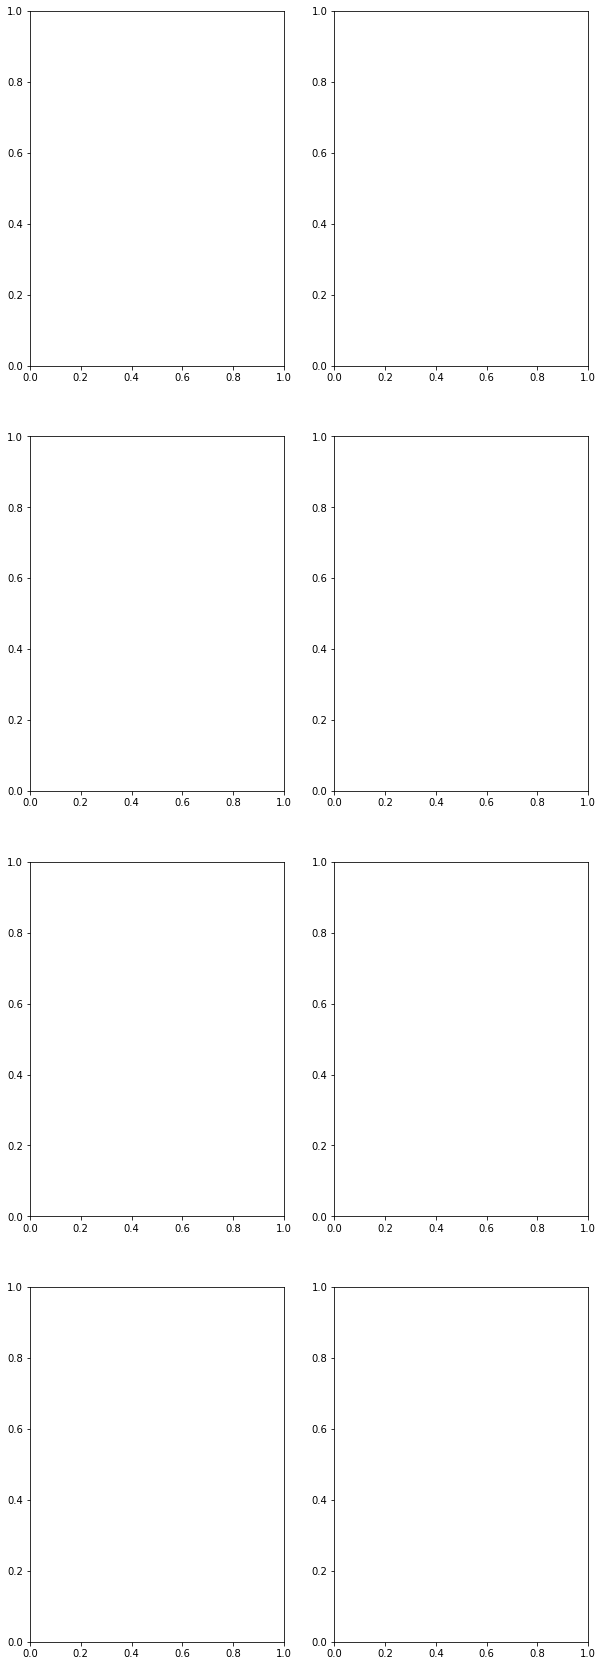

In [24]:
X_bkg = X_train[y_train==0]
X_sig = X_train[y_train==1]
print("defined bkg and sig training")

fig, axs = plt.subplots(4,2, figsize=(10,30))
print ("defined canvas")

hist, bins, ax = axs[0,0].hist( [ X_bkg[['met']].values, X_sig[['met']].values ], range(0,500,25), histtype='step', linewidth=2, label=['ttbar', 'WH']) 
hist, bins, ax = axs[0,1].hist( [ X_bkg[['ht']].values, X_sig[['ht']].values ], range(0,1500,50), histtype='step', linewidth=2) 
hist, bins, ax = axs[1,0].hist( [ X_bkg[['njets']].values, X_sig[['njets']].values ], range(0,15,1), histtype='step', linewidth=2) 
hist, bins, ax = axs[1,1].hist( [ X_bkg[['bjets']].values, X_sig[['bjets']].values ], range(0,15,1), histtype='step', linewidth=2) 
hist, bins, ax = axs[2,0].hist( [ X_bkg[['min_dphi_met_j1']].values, X_sig[['min_dphi_met_j1']].values ], range(0,3.5,0.5), histtype='step', linewidth=2, label=['tt', 'WH']) 
hist, bins, ax = axs[2,1].hist( [ X_bkg[['min_dphi_met_j2']].values, X_sig[['min_dphi_met_j2']].values ], range(0,3.5,0.5), histtype='step', linewidth=2, label=['tt', 'WH']) 
hist, bins, ax = axs[3,0].hist( [ X_bkg[['min_dphi_met_j3']].values, X_sig[['min_dphi_met_j3']].values ], range(0,3.5,0.5), histtype='step', linewidth=2, label=['tt', 'WH']) 
hist, bins, ax = axs[3,1].hist( [ X_bkg[['min_dphi_met_j4']].values, X_sig[['min_dphi_met_j4']].values ], range(0,3.5,0.5), histtype='step', linewidth=2, label=['tt', 'WH']) 

axs[0,0].set_xlabel(r'$E_{T}^{miss}$')
axs[0,1].set_xlabel(r'$H_{T}$')
axs[1,0].set_xlabel(r'$N_{jet}$')
axs[1,1].set_xlabel(r'$N_{b jet}$')
axs[2,0].set_xlabel(r'$dphi(met,j0)~{min}$')
axs[2,1].set_xlabel(r'$dphi(met,j1)~{min}$')
axs[3,0].set_xlabel(r'$dphi(met,j2)~{min}$')
axs[3,1].set_xlabel(r'$dphi(met,j3)~{min}$')

axs[0,0].legend()
axs[1,0].legend()
axs[2,0].legend()
axs[3,0].legend()